## Feature Importance 

### How Feature Importance is Calculated

In [80]:
from sklearn.datasets import make_classification


In [81]:
from sklearn.tree import DecisionTreeClassifier


In [82]:
X,y = make_classification(n_samples=5, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)

In [83]:
clf = DecisionTreeClassifier()


In [84]:
clf.fit(X,y)


DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

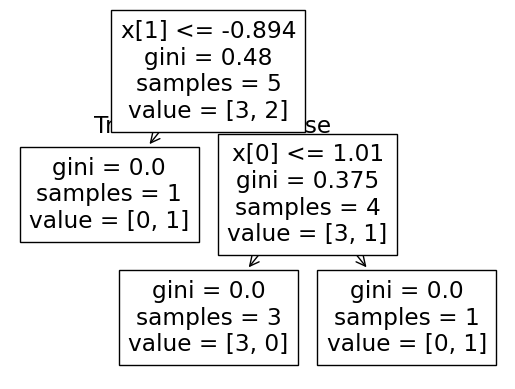

In [85]:
from sklearn.tree import plot_tree
plot_tree(clf)

### Feature Importance Calculation in Decision Tree

By observing the decision tree, we need to calculate which feature (0 or 1) is important.

- Although using `feature_importances_`, we can easily calculate this.
- If we use `feature_importances_`, we get feature one as more important, which is 1.
- In the definition of feature importance in `sklearn.tree.DecisionTreeClassifier`, the attribute `feature_importances_` is normalized. This means if we add all feature importances, it's going to be 1.

### Calculating Feature Importance

We need to see which rows were split according to that particular column.
Here we had 2 columns: 0 and 1.

- If we want to calculate the feature importance of the 0th column, we need to pick all those nodes that have done splitting because of the 0th column.
- In our tree, there is 1 such node.
- Now we need to calculate the importance of this 1 node.
- For column 1, we need to calculate feature importance by summing the feature importance of nodes splitting column 1, divided by the summation of all nodes. In our case, we have 3 nodes.
- Similarly, for feature 2, we will do the same.

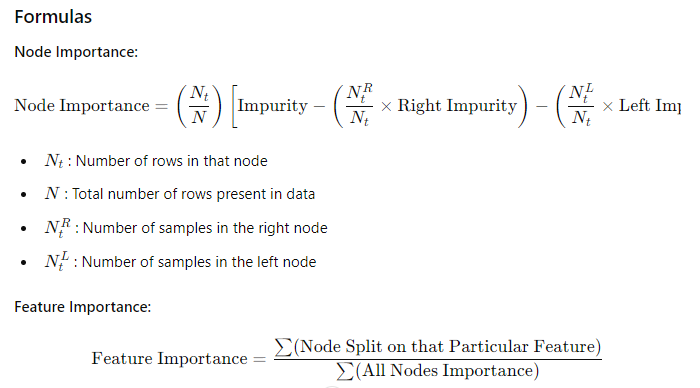


In [87]:
clf.feature_importances_


array([0.625, 0.375])

## Calculating Feature Importance in Random Forest

In a Random Forest model, feature importance is calculated by aggregating the importance values from multiple decision trees. Here's a step-by-step explanation:

1. **Multiple Decision Trees**:
   - A Random Forest consists of multiple decision trees (base estimators).
   - Each decision tree independently calculates the importance of each feature.

2. **Feature Importance Calculation**:
   - Suppose we use 5 decision trees as base estimators and have 2 features.
   - Each of the 5 decision trees will compute an importance value for each of the 2 features.
   - Thus, for each feature, we will have 5 importance values (one from each decision tree).

3. **Averaging Feature Importances**:
   - The Random Forest algorithm averages the importance values of each feature across all decision trees.
   - This averaged value represents the overall feature importance in the Random Forest model.

The process allows Random Forest to provide a robust measure of feature importance by leveraging the collective insights of multiple decision trees.


In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X,y)

RandomForestClassifier(n_estimators=2)

In [98]:
rf.feature_importances_


array([0.33258503, 0.66741497])

In [101]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=974245003),
 DecisionTreeClassifier(max_features='sqrt', random_state=497230287)]


- We have 2 estimators in our Random Forest model.
- To understand the contribution of each feature, we can print the feature importance values for each estimator.


In [104]:
print(rf.estimators_[0].feature_importances_)
print(rf.estimators_[1].feature_importances_)

print((0.43440083 + 0.23076923)/2) # basiocally calculating feature importance of 1st column 

[0.43440083 0.56559917]
[0.23076923 0.76923077]
0.33258503


In [ ]:
- so random forest doesnt do anything
- internally decision tree itself calculates the feature importance
- rf just average itout

## Feature Importance using Random Forest 

In [79]:
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv(r"../../../dataset/mnist_train.csv")

In [11]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- total there are 784 pixels

In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

<Axes: >

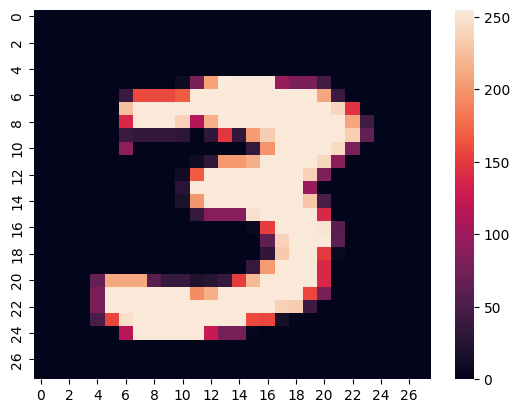

In [25]:
sns.heatmap(X.iloc[27].values.reshape(28,28))


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

- this will show me importance of each feature

In [8]:
rf.feature_importances_


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.35335713e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.74254216e-06, 2.80894193e-06,
       2.15661359e-06, 2.92808896e-06, 2.53832386e-06, 2.82155941e-06,
       3.40475337e-06, 2.79986486e-06, 4.27442347e-06, 5.53683903e-06,
       3.46520649e-06, 4.94567347e-06, 1.12001678e-06, 1.59720246e-06,
       3.18028064e-06, 0.00000000e+00, 3.66303459e-07, 3.65400508e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [26]:
rf.feature_importances_.shape


(784,)

- basically 784 are the total columns i.e pixels

<Axes: >

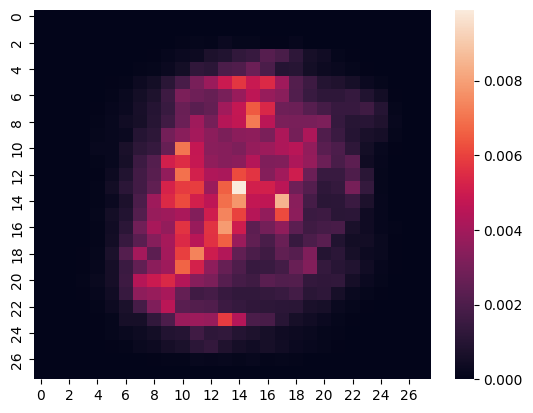

In [28]:
sns.heatmap(rf.feature_importances_.reshape(28,28))


- this heatmap explains the central pixels are more important in comparison to remaining pixels
